In [64]:
#importing dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading the data
df = pd.read_csv('cardekho_imputated.csv')

In [7]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


## EDA

In [8]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [45]:
#dropping unnecessary columns
df.drop('car_name', axis=1, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15411 non-null  object 
 1   model              15411 non-null  object 
 2   vehicle_age        15411 non-null  int64  
 3   km_driven          15411 non-null  int64  
 4   seller_type        15411 non-null  object 
 5   fuel_type          15411 non-null  object 
 6   transmission_type  15411 non-null  object 
 7   mileage            15411 non-null  float64
 8   engine             15411 non-null  int64  
 9   max_power          15411 non-null  float64
 10  seats              15411 non-null  int64  
 11  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.4+ MB


In [47]:
df["brand"].value_counts()

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

<Axes: xlabel='vehicle_age'>

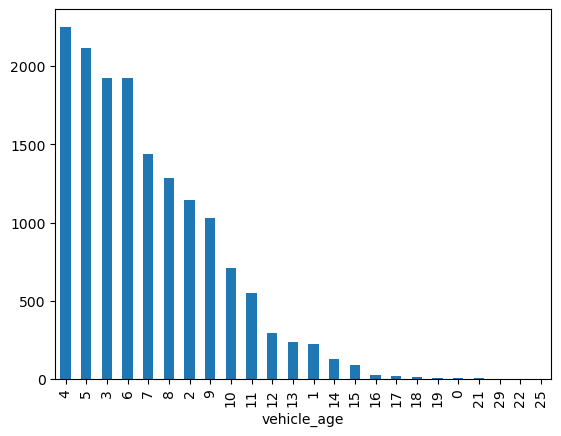

In [48]:
df["vehicle_age"].value_counts().plot(kind="bar")

In [49]:
df['km_driven'].value_counts()

km_driven
50000     553
40000     477
70000     466
60000     449
30000     363
         ... 
45898       1
39744       1
151048      1
99250       1
63595       1
Name: count, Length: 3688, dtype: int64

In [50]:
df['seller_type'].value_counts()

seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64

<Axes: xlabel='fuel_type'>

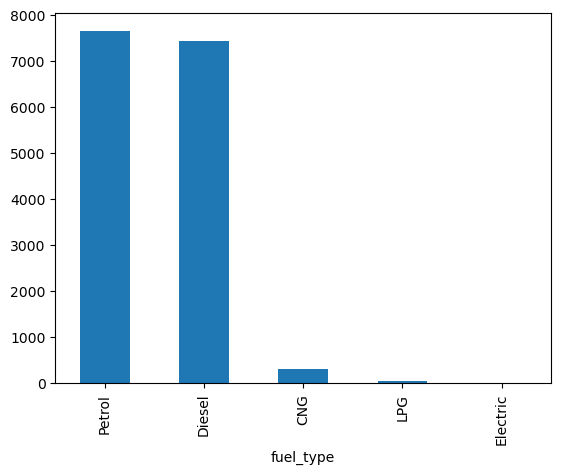

In [51]:
df['fuel_type'].value_counts().plot(kind="bar")


In [52]:
df['transmission_type'].value_counts()


transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64

### Observation

The maximum number of used cars sold is from companies: Maruti, Hyundai, Honda. Most of the cars sold is via non-trustmarked dealers. Most of the cars are sold after crossing the age of 4 years. It is observed that used cars had been driven for more than 50k km. Majority of the cars are petrol fuel-type and manual type.

In [53]:
#spliting the numerical and categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == "object"]

num_features = [feature for feature in df.columns if df[feature].dtype != "object"]

In [59]:
print(f"Number of categorical features are {len(cat_features)} and name of those features are {cat_features}")

Number of categorical features are 5 and name of those features are ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [60]:
print(f"Number of numerical features are {len(num_features)} and name of those features are {num_features}")

Number of numerical features are 7 and name of those features are ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [61]:
df[num_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<Axes: >

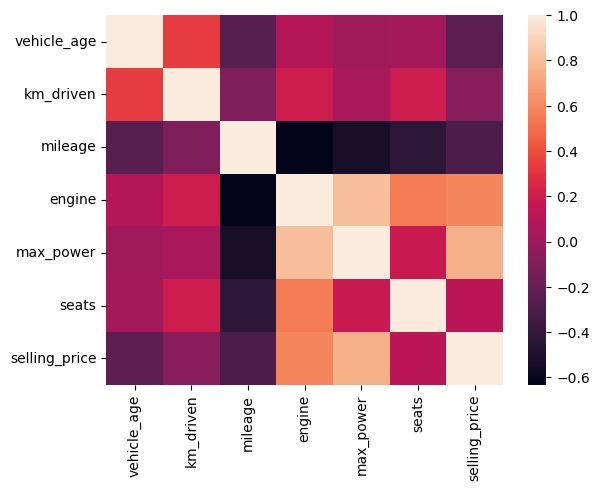

In [62]:
sns.heatmap(df[num_features].corr())

### Observation

Selling price of the used cars strongly and directly depends on the type of its engine and its maximum power, while it is inversely dependent on its age and distance covered. It is striking that cars with high mileage often go for lower prices.

In [66]:
df.to_csv('cardekho_data_cleaned.csv')